In [22]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [23]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

In [24]:
#Carga de dataset
data = pd.read_csv('White.csv')

In [25]:
print(data)

                         Name      Country                      Region  \
0             Vermentino 2017        Italy                     Toscana   
1           Ronco Broilo 2010        Italy  Colli Orientali del Friuli   
2     Weisser Schiefer s 2017      Austria               Südburgenland   
3             Chardonnay 2018      Germany                 Rheinhessen   
4        Maganza Zibibbo 2018        Italy             Terre Siciliane   
...                       ...          ...                         ...   
3759     Sauvignon Blanc 2019  New Zealand                 Marlborough   
3760   Vinho Verde Sweet N.V.     Portugal                 Vinho Verde   
3761     Sauvignon Blanc 2018  New Zealand                 Marlborough   
3762     Sauvignon Blanc 2019  New Zealand                 Marlborough   
3763  Vinho Verde Branco N.V.     Portugal                 Vinho Verde   

                       Winery  Rating  NumberOfRatings  Price  Year  
0         Famiglia Castellani     3.8    

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3764 entries, 0 to 3763
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             3764 non-null   object 
 1   Country          3764 non-null   object 
 2   Region           3764 non-null   object 
 3   Winery           3764 non-null   object 
 4   Rating           3764 non-null   float64
 5   NumberOfRatings  3764 non-null   int64  
 6   Price            3764 non-null   float64
 7   Year             3764 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 235.4+ KB


In [27]:
# Lista con el nuevo orden de las columnas
nuevo_orden_columnas = ['Name', 'Country', 'Region', 'Winery', 'Rating', 'NumberOfRatings', 'Year', 'Price']  # Agrega las demás columnas

# Reordena las columnas del DataFrame según el nuevo orden
data = data[nuevo_orden_columnas]

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3764 entries, 0 to 3763
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             3764 non-null   object 
 1   Country          3764 non-null   object 
 2   Region           3764 non-null   object 
 3   Winery           3764 non-null   object 
 4   Rating           3764 non-null   float64
 5   NumberOfRatings  3764 non-null   int64  
 6   Year             3764 non-null   object 
 7   Price            3764 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 235.4+ KB


In [29]:
#variables categoricas
columnas_categoricas = data.select_dtypes(include=['object']).columns
#variables fechas
columnas_fechas = data.select_dtypes(include=['datetime64']).columns

In [30]:
#Procesamiento de frases o palabras
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])

In [31]:
#Fechas a numeros aunque no se utiliza en este caso
for columna in columnas_fechas:
  data[columna] = pd.to_numeric(data[columna].map(datetime.timestamp))

In [32]:
#resultado con objetos convertidos
print(data)

      Name  Country  Region  Winery  Rating  NumberOfRatings  Year  Price
0     2762       15     389     521     3.8               25    17   5.65
1     2212       15     104     325     4.3               25    10  44.90
2     2957        2     374    1345     4.2               25    17  33.25
3      439       11     309     736     3.9               25    18   8.99
4     1564       15     382     818     3.9               25    18   8.60
...    ...      ...     ...     ...     ...              ...   ...    ...
3759  2357       19     221     965     4.0             4423    19  10.66
3760  2837       20     427     215     4.0             4609    21   5.05
3761  2356       19     221     717     3.9             5105    18  14.90
3762  2357       19     221     632     4.2             5817    19   7.75
3763  2833       20     427     215     3.7            62980    21   4.35

[3764 rows x 8 columns]


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3764 entries, 0 to 3763
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             3764 non-null   int32  
 1   Country          3764 non-null   int32  
 2   Region           3764 non-null   int32  
 3   Winery           3764 non-null   int32  
 4   Rating           3764 non-null   float64
 5   NumberOfRatings  3764 non-null   int64  
 6   Year             3764 non-null   int32  
 7   Price            3764 non-null   float64
dtypes: float64(2), int32(5), int64(1)
memory usage: 161.9 KB


In [34]:
# Lectura de Datos
# y es la sexta columna ya que es la columna de precios
X = data.iloc[:, :7]
y = data.iloc[:, 7]
m = y.size

In [35]:
print(X)
print('*'*25)
print(y)

      Name  Country  Region  Winery  Rating  NumberOfRatings  Year
0     2762       15     389     521     3.8               25    17
1     2212       15     104     325     4.3               25    10
2     2957        2     374    1345     4.2               25    17
3      439       11     309     736     3.9               25    18
4     1564       15     382     818     3.9               25    18
...    ...      ...     ...     ...     ...              ...   ...
3759  2357       19     221     965     4.0             4423    19
3760  2837       20     427     215     4.0             4609    21
3761  2356       19     221     717     3.9             5105    18
3762  2357       19     221     632     4.2             5817    19
3763  2833       20     427     215     3.7            62980    21

[3764 rows x 7 columns]
*************************
0        5.65
1       44.90
2       33.25
3        8.99
4        8.60
        ...  
3759    10.66
3760     5.05
3761    14.90
3762     7.75
3763 

In [36]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [37]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

      Name  Country  Region  Winery  Rating  NumberOfRatings  Year
0     2762       15     389     521     3.8               25    17
1     2212       15     104     325     4.3               25    10
2     2957        2     374    1345     4.2               25    17
3      439       11     309     736     3.9               25    18
4     1564       15     382     818     3.9               25    18
...    ...      ...     ...     ...     ...              ...   ...
3759  2357       19     221     965     4.0             4423    19
3760  2837       20     427     215     4.0             4609    21
3761  2356       19     221     717     3.9             5105    18
3762  2357       19     221     632     4.2             5817    19
3763  2833       20     427     215     3.7            62980    21

[3764 rows x 7 columns]
Media calculada: Name               1519.124867
Country              13.535600
Region              255.731934
Winery              749.134431
Rating                3.817906

In [38]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [39]:
print(X)

[[ 1.          1.40316616  0.20763745 ... -0.06711786 -0.15174363
  -0.09119138]
 [ 1.          0.7822338   0.20763745 ...  1.80700403 -0.15174363
  -3.97279142]
 [ 1.          1.6233149  -1.63563466 ...  1.43217965 -0.15174363
  -0.09119138]
 ...
 [ 1.          0.94480518  0.77479811 ...  0.30770652  4.59003435
   0.46332291]
 [ 1.          0.94593415  0.77479811 ...  1.43217965  5.25463001
   1.0178372 ]
 [ 1.          1.48332288  0.91658827 ... -0.44194224 58.61176682
   2.12686579]]


In [40]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J

In [41]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

theta calculado por el descenso por el gradiente: [20.48172734 -1.19072556 -1.31084315 -0.1627607  -1.14523078 12.30828052
 -0.29310878 -8.39342337]
El valor predecido es (usando el descenso por el gradiente): 24.1946


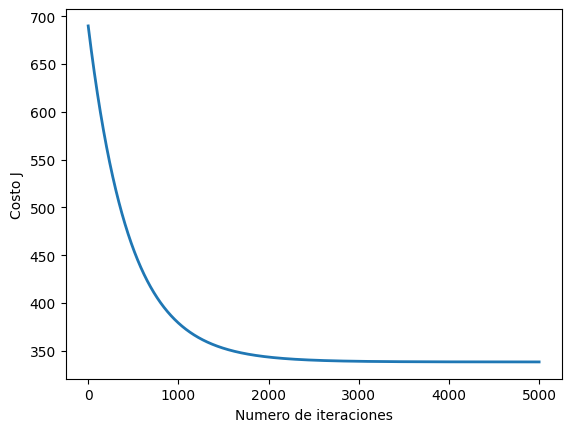

In [42]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 5000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(8)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el precio para un vino con distintas caracteristicas
X_array = [1, 2212, 1, 104, 3.25, 3.8, 25, 17]
X_array[1:8] = (X_array[1:8] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El valor predecido es (usando el descenso por el gradiente): {:.4f}'.format(price))